## 1-Dataset: metabolom_data.csv : measurements of monoterpenes in certain plant leaves. 

#### The aim of this research (Hudon et al.2021) is how to apply MCA across multiple scales to inform conservation of herbivores.

They focused on the sagebrush steppe ecosystem that once covered a large region in the western United States. Sagebrush (Artemisia spp.) are the dominant plant species in these ecosystems and are critical for two sagebrush obligate species: the pygmy rabbit Brachylagus idahoensis and the greater sage-grouse (Centrocercus urophasianus). Both herbivores are considered species of conservation concern across the Intermountain West. they investigated several characteristics of the Sagebrush plants(including leaf metabolites) that might have effect on biodiversity of pygmy rabbit and sage-grouse in that region. 

In regard to leaf metabolites they were interested to see which community of metabolites are presents in these two species of sagbosh. They used two case studies from the sagebrush steppe ecosystem to find community mixtures of metabolites from leaf material of individual sagebrush plants. they assumed that the unique mixtures of metabolites in plants may better explain intake by herbivores than looking for the effect of an individual monoterpenes.



## The best method of component analysis for this dataset is Factor analysis

Since foraging herbivores consume mixtures of metabolites, not individual metabolites, aproaches that focus on the presence or concentration of a specific metabolite likely miss differences in the relative ratios of compounds that better determine diet selection by herbivores and predict interactions with the microbial features in herbivore guts. 

for this dataset I would like to look for the co-occurance of communities of metabolites(volatile monoterpens) in the dataset. Communities are latent because they are not directly observed in relative abundance data; instead, communities represent a hidden structure that can be uncovered with statistical modeling. Because we are looking for a hidden layer of data across this dataset, FA is the best method to perform. 
By use of FA we factorize relative abundance data into two matrices, one representing membership of communities in sampling units and the other representing feature membership in communities. 


In [1]:
#Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:

df = pd.read_csv("DATASET/metabolom_data.csv")
df.shape

(94, 19)

In [4]:
df.head(10)

,SampleID,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,MF032,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,MF034,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,MF036,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,MF038,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,MF049,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086
5,MF050,wyoming,19.456389,68.649995,7.221566,1.082906,0.000000,6.966625,23.360095,19.666428,4.094604,33.861303,5.764112,5.351256,15.158635,54.930451,23.420237,2.298289,8.395611
6,MF051,wyoming,21.042811,76.400769,2.820267,2.115513,3.385743,6.474307,25.991551,37.589268,3.533810,40.697364,5.741429,22.873859,9.629240,26.529507,21.629717,122.469462,4.751689
7,MF052,wyoming,16.775551,42.222259,3.890756,3.458757,5.172362,3.461300,33.177921,39.990070,0.898483,6.781768,6.877980,19.688320,19.591162,22.252457,21.624343,226.940040,6.772960
8,MF053,wyoming,11.328051,18.110563,4.617156,1.813888,9.222701,48.718686,90.098227,3.409925,6.462651,101.781428,3.551753,2.802533,0.471096,39.084773,6.037963,4.059835,4.062073
9,MF054,wyoming,13.958225,8.983435,1.642927,1.055490,2.894899,24.519416,32.775682,6.619945,5.389725,78.255016,5.721445,2.388319,7.618671,124.486722,2.313027,1.407201,2.453051


### Describing the dataset: 
#### column Species : two species of  sagebrush 
#### columns 2 to 19 : metabolites measured from leaf of individual sagebrush plants (17 metabolites). 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SampleID       94 non-null     object 
 1   Species        94 non-null     object 
 2   Unk3.2         94 non-null     float64
 3   Unk3.6         94 non-null     float64
 4   Unk11.9        94 non-null     float64
 5   Unk12.4        94 non-null     float64
 6   aPinene        94 non-null     float64
 7   Camphene       94 non-null     float64
 8   bPinene        94 non-null     float64
 9   aPhellendrine  94 non-null     float64
 10  pcymene        94 non-null     float64
 11  Cineole        94 non-null     float64
 12  Unk18.2        94 non-null     float64
 13  Unk18.6        94 non-null     float64
 14  Unk20.5        94 non-null     float64
 15  Camphor        94 non-null     float64
 16  Unk21          94 non-null     float64
 17  Unk21.5        94 non-null     float64
 18  Unk23.5     

In [6]:
df['Species'].value_counts()

wyoming    66
3-tip      26
hybrid      2
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

SampleID         0
Species          0
Unk3.2           0
Unk3.6           0
Unk11.9          0
Unk12.4          0
aPinene          0
Camphene         0
bPinene          0
aPhellendrine    0
pcymene          0
Cineole          0
Unk18.2          0
Unk18.6          0
Unk20.5          0
Camphor          0
Unk21            0
Unk21.5          0
Unk23.5          0
dtype: int64

#### all the metabolites values  are as float, and there are no missing values. 

### Codes to perform factor analysis:

FA starts with performing PCA, followed by selection of a number of components that is assumed to span the latent variable space. 
These components are then rotated in the variable space, such that each component has a structure that is as simple as possible. A popular method for this is the varimax rotation that maximizes the sum of variances over the rows of the selected components. 

First we check whether the data needs to be normalized. 

In [18]:

data = df.iloc[:, 2:].values

(data[0])

array([ 17.44721575,  78.48038755,   2.57501542,   0.48058841,
         6.8735486 ,  14.66779878,  10.50544745,  64.30877726,
         5.31157514,   6.91781008,  10.25848494,  29.72540172,
         5.32027403,  92.86892199,  32.73387895, 245.3730273 ,
         9.19084487])

In [10]:
vars = data.var(axis=0)
print(min(vars), max(vars))

12.749655988274966 72224.28569994732


The data needs to be normalized. since the variance is large. 

In [19]:
# Determining the **correlation** matrix
centered = data - data.mean(axis=0)
zscores = centered / centered.std(axis=0)
correlation_matrix = np.dot(zscores.T, zscores) / (zscores.shape[0] - 1)

In [23]:
# Determining principal components

eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
# print(eigenvectors)
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]


The Eigenvalues are the variances of the projections on the eigenvectors, so they summarize the part of the information associated with each principal component. the sum of the eigenvaluses is equal to the sum of the original individual variances. 

two plots of the eigenvalues are of importance. the scree plot or elbow plot, and the cumulative percentage of the total variance. the scree plot is important to determine which eigenvectors are significant, while the plot of comulative percentage can be used to asses how many eigenvectors are needed to retain a certain amount of information. 

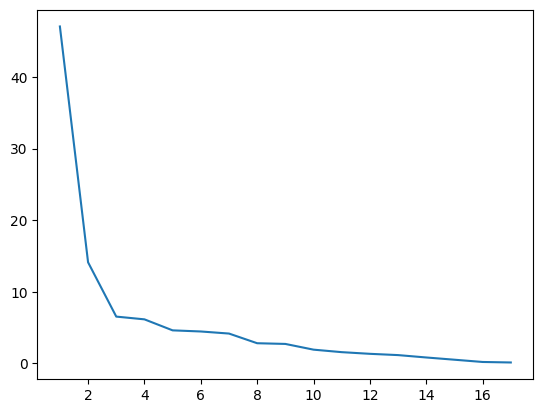

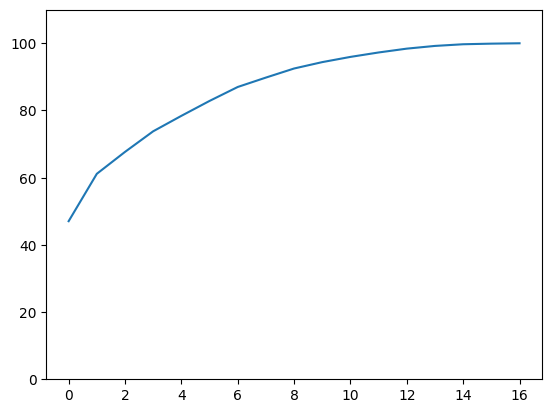

In [24]:
# 'Scree' plot of eigenvalues
plt.plot(np.arange(len(eigenvalues)) + 1, 100 * eigenvalues / eigenvalues.sum())
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * eigenvalues.cumsum() / sum(eigenvalues))
plt.ylim((0, 110))
plt.show()

the scree plot(the first plot) shows that there are two eigenvectors that captures the greater percentage of variation. The firs break point correspond the number two. the second break correspond the third eigen vector.

the second plot shows that, the first two eigenvectors acount for around 70 percent of variation in the dataset.  

next we project the original data on to these two eigenvectors, which coresponds to rotating the data, such that the first two eigenvectors get aligned with cartesian X and Y axis, and can be plotted accordingly. The projections are typically called the scores of the data on the principal components. 

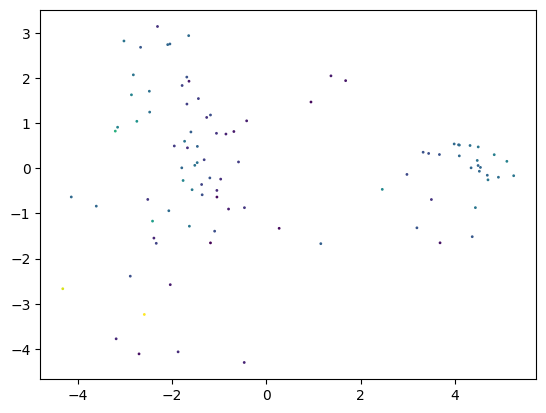

In [25]:
# Projection of data onto components (rotation of data)

projections = np.dot(zscores, eigenvectors)

plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=1)
plt.show()

### Here we perform the Factor analysis
#### factor analysis is a rotation on a selected number of components. it is rotation on loadings. is not the rotaion in inner data space, but it is the rotation in the variable space.

In [26]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

NameError: name 'variables' is not defined

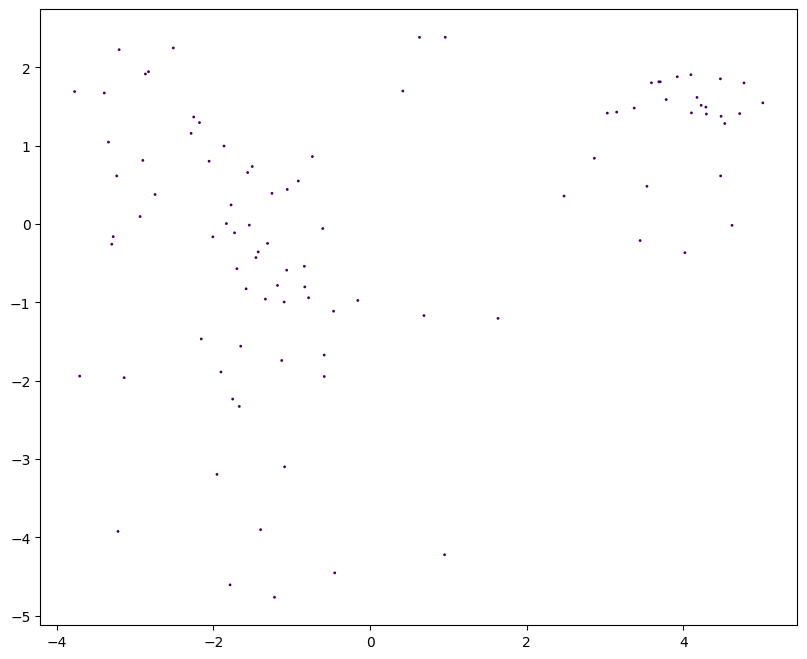

In [27]:
V = varimax(eigenvectors[:, :2])

fa_projections = np.dot(zscores, V)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')
plt.scatter(fa_projections[:,0], fa_projections[:,1], c=df.Species=='W', s=1)
for var, (x,y) in zip(variables, 10*V[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.1)
    plt.text(1.1*x, 1.1*y, var)
    for Species, (x,y) in zip(df.Species, fa_projections[:, :2]):
        plt.text(x, y, Species, c='red')
        
plt.title("projections on first two factors")
plt.xlabel('Factor1')
plt.ylabel('Factor2')   
plt.show()

The varimax rotation resulted in the first component (factor)to be associated with the two species taxa, 3-tip and wyoming, and the second component to reflect the monoterpens.

Based on the result of factor analysis we observe 4 comunities of monoterpens that were relevant to herbivor diet selection in two different sagebrush taxa. the community one: apinene, cymene, UNK12.4, UNK21, PCymene. the comunity 2: bphinene, Cineole, Unk20.5, Camphor, UNK3.2, Unk11.9. the comunity 3: Unk18.2. the comunity 4: Unk21.5, Unk18.6, aphellendrine. At the individual sampling unit (plant) level, 3-tip sagebrush Artemisia tripartita had a high probability of Community 1, whereas Wyoming sagebrush was dominated by Communities 1, 2 and 4.  

## 2- Linear regression on Metabolom data

I am intersetd to see whether we can predict the amount of a particular monoterpen in a particular community of monoterpens (which identified form the Factor analysis in the previous step), from the level of another monoterpens in this community. and to understand that whether there is any linear relationship between the level of the monoterpens in a particular community of monoterpens. 

I choose the community one which include aPinen, pcymene, UNK12.4, Unk21, PCymene monoterpens. 
I choose apinene as a dependent variable (y), and  pcymene as an independent variable(X). and I will perform simple linear regression.

𝑦𝑖=𝑎+𝑏𝑥𝑖+𝜖𝑖

our prediction (y^=yi) is based on three parameters: 𝑎 is intercept ,  𝑏  is the slope and the, and  𝜖𝑖  is residual(error) that captures the deviation of the response from the model. 

To fit the model, first we definr our y and x.  then we calculate the correlation between our observed y and our predicted y which named here as r2 and called also the square root of coefficient of dittermination. r2  indicate the proportion of explained variance. 



Intercept: -2.167
Slope:     1.863
r^2:         0.849


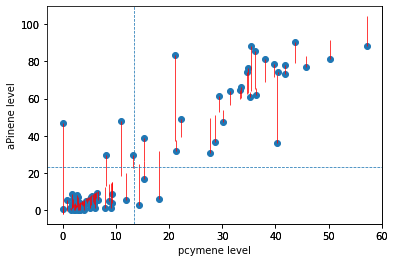

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# Hardcore
x = df.pcymene
X = np.stack((np.ones(df.shape[0]), x), axis=1)
y = df.aPinene
a, b = np.linalg.inv(X.T @ X) @ X.T @ y

# Fit:
r2 = b**2 * x.var() / y.var()
print("\nIntercept: {:.3f}\nSlope:     {:.3f}\nr^2:         {:.3f}".format(a, b, r2))

# The regression line
newx = np.linspace(x.min(), x.max())
plt.plot(newx, a + b * newx, linewidth=3, c="orange")

# The residuals
segs = np.array(((x, x), (y, a + b * x))).T
axes = plt.axes()
axes.add_collection(mc.LineCollection(segs, color="red", linewidths=0.75))

# The data
plt.scatter(x, y)
plt.xlabel("pcymene level")
plt.ylabel("aPinene level")

# The individual means
plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(y.mean(), ls='--', lw=0.75)

plt.show()


The intercept is -2.167, and the slope coeficient for the explanotory variable is 1.863. the r2 is 0.85 which is very high, and shows that 85 percent of the varaition in dependent variable is explained by the independent variable(regressors). it means that there is linear relationship between the level of pcymene and aPinene. 

The r square value is used as a measure of goodness of fit. in this model the r2 is higher than 0.8 therefore our model is accurate. 


## 2- Dateset: SourceData2.xlsx 

This dataset contains infrared spectra from saliva from people that tested negative and people that tested positive for SARS nCoV2019. For each subject, three spectra were determined.

Based on what has been described in the article, Infrared light interacting with the intrinsic vibrational modes of molecules generates a spectrum that represents a unique chemical fingerprint of the sample. These chemical fingerprints can be utilized to seprate these two groups of people(covid posive and negative). 
I would like to look for the component in this dataset that maximizes the separation of these two groups. Therefore, I will perform Linear discriminant Analysis. 


In [207]:
data = pd.read_excel('C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\data science 2\\multivariate analysis\\MCA_5july\\SourceData2.xlsx')

In [208]:
data

,ID,Ct,1300,1298,1296,1294,1292,1290,1288,1286,...,818,816,814,812,810,808,806,804,802,800
0,N1,NaN,0.277705,0.277532,0.277387,0.277217,0.277042,0.276930,0.276856,0.276737,...,0.242726,0.241897,0.241107,0.240374,0.239742,0.239234,0.238833,0.238523,0.238314,0.238197
1,N1,NaN,0.251624,0.251438,0.251268,0.251067,0.250843,0.250645,0.250467,0.250280,...,0.213427,0.212628,0.211891,0.211234,0.210662,0.210173,0.209763,0.209450,0.209267,0.209202
2,N1,NaN,0.083310,0.083293,0.083307,0.083338,0.083391,0.083478,0.083585,0.083674,...,0.085724,0.085260,0.084823,0.084445,0.084137,0.083894,0.083715,0.083602,0.083543,0.083495
3,N2,NaN,0.067509,0.067070,0.066684,0.066359,0.066106,0.065938,0.065852,0.065828,...,0.055012,0.054969,0.054902,0.054832,0.054781,0.054767,0.054787,0.054823,0.054857,0.054893
4,N2,NaN,0.129576,0.128690,0.127912,0.127232,0.126676,0.126306,0.126138,0.126113,...,0.099128,0.098794,0.098337,0.097886,0.097527,0.097272,0.097091,0.096970,0.096906,0.096881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,P30,16.95,0.169349,0.169277,0.169212,0.169121,0.169057,0.169072,0.169133,0.169197,...,0.103987,0.103974,0.103963,0.103903,0.103825,0.103762,0.103700,0.103615,0.103513,0.103393
179,P30,16.95,0.277632,0.277423,0.277119,0.276688,0.276211,0.275814,0.275529,0.275318,...,0.177726,0.178111,0.178484,0.178827,0.179161,0.179454,0.179650,0.179756,0.179837,0.179928
180,P31,32.10,0.175842,0.174590,0.173493,0.172534,0.171712,0.171067,0.170605,0.170303,...,0.097160,0.097295,0.097339,0.097355,0.097408,0.097484,0.097523,0.097521,0.097521,0.097536
181,P31,32.10,0.305833,0.304135,0.302663,0.301395,0.300495,0.300195,0.300463,0.301050,...,0.221463,0.222138,0.222542,0.222775,0.222966,0.223190,0.223473,0.223837,0.224288,0.224766


#### First I will add a new column to data frame which define all the negative cases with 'N', and all the positive cases to 'p'

In [209]:
#form 0 to 89 is N, form 90 to 182 is p. 

In [210]:
# checking whether there is strange data in the 'ID' column
data['ID'].unique()

array(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20',
       'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29',
       'N30', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31'], dtype=object)

In [211]:
data['ID'].value_counts()

N1     3
P2     3
P4     3
P5     3
P6     3
      ..
N26    3
N27    3
N28    3
N29    3
P31    3
Name: ID, Length: 61, dtype: int64

In [212]:
n_array = np.repeat('N', 90)
p_array = np.repeat('P', 93)
test = np.concatenate((n_array, p_array))
test

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P

In [213]:
data['Diagnostic'] = test

In [214]:
data

,ID,Ct,1300,1298,1296,1294,1292,1290,1288,1286,...,816,814,812,810,808,806,804,802,800,Diagnostic
0,N1,NaN,0.277705,0.277532,0.277387,0.277217,0.277042,0.276930,0.276856,0.276737,...,0.241897,0.241107,0.240374,0.239742,0.239234,0.238833,0.238523,0.238314,0.238197,N
1,N1,NaN,0.251624,0.251438,0.251268,0.251067,0.250843,0.250645,0.250467,0.250280,...,0.212628,0.211891,0.211234,0.210662,0.210173,0.209763,0.209450,0.209267,0.209202,N
2,N1,NaN,0.083310,0.083293,0.083307,0.083338,0.083391,0.083478,0.083585,0.083674,...,0.085260,0.084823,0.084445,0.084137,0.083894,0.083715,0.083602,0.083543,0.083495,N
3,N2,NaN,0.067509,0.067070,0.066684,0.066359,0.066106,0.065938,0.065852,0.065828,...,0.054969,0.054902,0.054832,0.054781,0.054767,0.054787,0.054823,0.054857,0.054893,N
4,N2,NaN,0.129576,0.128690,0.127912,0.127232,0.126676,0.126306,0.126138,0.126113,...,0.098794,0.098337,0.097886,0.097527,0.097272,0.097091,0.096970,0.096906,0.096881,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,P30,16.95,0.169349,0.169277,0.169212,0.169121,0.169057,0.169072,0.169133,0.169197,...,0.103974,0.103963,0.103903,0.103825,0.103762,0.103700,0.103615,0.103513,0.103393,P
179,P30,16.95,0.277632,0.277423,0.277119,0.276688,0.276211,0.275814,0.275529,0.275318,...,0.178111,0.178484,0.178827,0.179161,0.179454,0.179650,0.179756,0.179837,0.179928,P
180,P31,32.10,0.175842,0.174590,0.173493,0.172534,0.171712,0.171067,0.170605,0.170303,...,0.097295,0.097339,0.097355,0.097408,0.097484,0.097523,0.097521,0.097521,0.097536,P
181,P31,32.10,0.305833,0.304135,0.302663,0.301395,0.300495,0.300195,0.300463,0.301050,...,0.222138,0.222542,0.222775,0.222966,0.223190,0.223473,0.223837,0.224288,0.224766,P


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Columns: 254 entries, ID to Diagnostic
dtypes: float64(252), object(2)
memory usage: 363.3+ KB


In [216]:
# getting an idea of the size of the data
data.shape

(183, 254)

In [217]:
# Checking for null values
data.isnull().sum()

ID              0
Ct            132
1300            0
1298            0
1296            0
             ... 
806             0
804             0
802             0
800             0
Diagnostic      0
Length: 254, dtype: int64

only 'ct' column contains missing values. since I do not use this column for the analysis, no need to drop these rows. 

## Code to perform the LDA

first we select our two groups(positive and negative). then, we make the means of the two groups. in LDA, the Distance to the class mean is used. In the next step we make the pooled covariance matrix(S). then LDA gives a single component 'a' which represents the maximum sepration of the two groups. then we project the data on the discriminant axis. We deflate the data to remove the projection onto the LDA component. A subsequent PCA on the deflated data gives the principal directions of variance that are orthogonal to the direction of maximum discrimination. then we Plot the projection on the discriminating axis and on the first pc of the deflated data. 


For LDA we do not need to consider the  normality assumption. 


In [218]:
# I select the columns that contain  spectra values  (from 2 to 253)

negative = np.array(data[data.Diagnostic == 'N'].values[:, 2:253], dtype=float)
positive = np.array(data[data.Diagnostic == 'P'].values[:, 2:253], dtype=float)

In [219]:
# making the means of the two groups
mn = negative.mean(axis=0)
mp = positive.mean(axis=0)

In [220]:
# define  the shape of each group
shn = negative.shape[0]
shp = positive.shape[0]

In [221]:
# making the covariance matrix of each group
Sn = np.cov(negative.T)
Sp = np.cov(positive.T)

In [222]:
# making the pooled covariance matrix
Sp = ((shn - 1) * Sn + (shp - 1) * Sp) / (shn + shp - 2)

In [223]:
# The discriminant axis
a = np.linalg.inv(Sp) @ (mn - mp)
a /= np.sqrt((a ** 2).sum())

In [224]:
# Projecting the data onto the discriminant axis
tn = negative @ a
tp = positive @ a

In [225]:
# Deflate both groups
En = negative - tn[:, None] * a[None, :]
Ep = positive - tp[:, None] * a[None, :]

In [226]:
# Combine
X = np.concatenate((En, Ep), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
Tn = negative @ vecs
Tp = positive @ vecs

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


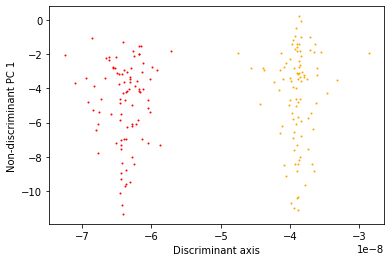

In [227]:
# Plot
plt.scatter(tn, Tn[:, 0], s=1, c="red")
plt.scatter(tp, Tp[:, 0], s=1, c="orange")
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")    
plt.show()

The two groups are very well separated.  this means that there are some chemical finger prints which are completely different between these two group of people. we found the component that maximised the difference between covid positive and covid negative subjects. this information can be used to find out which chemical fingerprint(which spectras) make the most difference between these two groups and are more useful for testing covid patients. 

### Prediction of Diagnostic using  Regression models

Linear regression models can  be applied to predict diagnostic outcomes of covid subjects based on the chemical differences between infected and uninfected samples. Here I will perform multilinear regression.  the dependent variable is 'Diagnostic' column (categorical), and I choose several independet(explanatory) variables to predic the dependent variable.

In [228]:

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [229]:
#we need to make diagnostic column numerical
data2 = data.copy()
data2['Diagnostic'] = data2['Diagnostic'].map({'N': '1', 'P': '0'})

In [230]:
data2

,ID,Ct,1300,1298,1296,1294,1292,1290,1288,1286,...,816,814,812,810,808,806,804,802,800,Diagnostic
0,N1,NaN,0.277705,0.277532,0.277387,0.277217,0.277042,0.276930,0.276856,0.276737,...,0.241897,0.241107,0.240374,0.239742,0.239234,0.238833,0.238523,0.238314,0.238197,1
1,N1,NaN,0.251624,0.251438,0.251268,0.251067,0.250843,0.250645,0.250467,0.250280,...,0.212628,0.211891,0.211234,0.210662,0.210173,0.209763,0.209450,0.209267,0.209202,1
2,N1,NaN,0.083310,0.083293,0.083307,0.083338,0.083391,0.083478,0.083585,0.083674,...,0.085260,0.084823,0.084445,0.084137,0.083894,0.083715,0.083602,0.083543,0.083495,1
3,N2,NaN,0.067509,0.067070,0.066684,0.066359,0.066106,0.065938,0.065852,0.065828,...,0.054969,0.054902,0.054832,0.054781,0.054767,0.054787,0.054823,0.054857,0.054893,1
4,N2,NaN,0.129576,0.128690,0.127912,0.127232,0.126676,0.126306,0.126138,0.126113,...,0.098794,0.098337,0.097886,0.097527,0.097272,0.097091,0.096970,0.096906,0.096881,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,P30,16.95,0.169349,0.169277,0.169212,0.169121,0.169057,0.169072,0.169133,0.169197,...,0.103974,0.103963,0.103903,0.103825,0.103762,0.103700,0.103615,0.103513,0.103393,0
179,P30,16.95,0.277632,0.277423,0.277119,0.276688,0.276211,0.275814,0.275529,0.275318,...,0.178111,0.178484,0.178827,0.179161,0.179454,0.179650,0.179756,0.179837,0.179928,0
180,P31,32.10,0.175842,0.174590,0.173493,0.172534,0.171712,0.171067,0.170605,0.170303,...,0.097295,0.097339,0.097355,0.097408,0.097484,0.097523,0.097521,0.097521,0.097536,0
181,P31,32.10,0.305833,0.304135,0.302663,0.301395,0.300495,0.300195,0.300463,0.301050,...,0.222138,0.222542,0.222775,0.222966,0.223190,0.223473,0.223837,0.224288,0.224766,0


In [254]:
#get X and y. I select all spectras fingerprint columns as explanatory variables
y = np.array(data2['Diagnostic']) 
x1 = np.array(data2.iloc[:,2:253]) 
x1.shape

(183, 251)

In [255]:
# Normalize the data
def normalize(x1):
    scaler = StandardScaler()
    scaler = scaler.fit(x1)
    x1 = scaler.transform(x1)
    return x1

x1 = normalize(x1)

In [256]:
reg = LinearRegression()
reg.fit(x1, y)

LinearRegression()

In [257]:
reg.score(x1, y)

1.0

In [251]:
pred = reg.predict(x1)

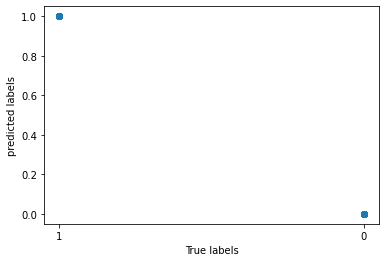

In [252]:
plt.scatter(y, (pred))
plt.xlabel('True labels')
plt.ylabel('predicted labels')
plt.show()

In [259]:
from sklearn.metrics import r2_score
score = r2_score(y, pred)
print(f' r2 score is {score}')

 r2 score is 1.0


R squred is 1. the variation in Diagnostic is totally explained by spectra fingerprints.  our model is perfectly fit. 

### Multilinear Regression using Machine learning models

Here I use logistic regression since our y variabe is a categorical binary variable. I split the data in to train and test to increase the accuracy of prediction. 

In [260]:
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = .3, random_state=42)

# train the model
logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [261]:
# Evaluation of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[20  6]
 [11 18]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.75      0.62      0.68        29

    accuracy                           0.69        55
   macro avg       0.70      0.69      0.69        55
weighted avg       0.70      0.69      0.69        55



In [263]:
print(logreg.coef_)

[[ 0.27494806  0.23319433  0.19493201  0.16018346  0.1278645   0.09780656
   0.07133818  0.04940435  0.0310245   0.0147795   0.00086106 -0.01037449
  -0.02069365 -0.03240976 -0.04515329 -0.05703162 -0.06841166 -0.08191007
  -0.09884263 -0.11789513 -0.13706381 -0.1549568  -0.1704004  -0.18304711
  -0.19454361 -0.20699862 -0.22004813 -0.23127572 -0.23899127 -0.243128
  -0.24329357 -0.23766418 -0.22464763 -0.20431251 -0.17788513 -0.14745538
  -0.11585585 -0.08476161 -0.05230819 -0.01437553  0.03095329  0.08106456
   0.13127677  0.17770954  0.21818613  0.25269962  0.28374635  0.31409034
   0.34216693  0.36121342  0.36454654  0.35147342  0.32708746  0.2971084
   0.26394959  0.22646647  0.18215226  0.12986662  0.07113002  0.009123
  -0.05264693 -0.11003666 -0.15777052 -0.19162928 -0.21133756 -0.22046256
  -0.22359062 -0.2244042  -0.22527733 -0.22689264 -0.22794728 -0.22610192
  -0.21953836 -0.20685546 -0.18624254 -0.15653368 -0.11870524 -0.0752849
  -0.02831669  0.02104598  0.07106145  0.118

Our prediction has around 70% accuracy. the accuracy can be increased by spliting the train and test in different way. but in general as we observed in the result of logistic regression the outcome of Diagnostic of covid subject is predictable by spectra fingerprints. and this method is accurate for testing the covid pationts.